In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [173]:
df=pd.read_csv('aster_data.csv')

C:\Users\rithv\AppData\Local\Temp\ipykernel_30628\3656920345.py:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('aster_data.csv')


In [174]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [175]:
df.shape

(839714, 31)

In [176]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [177]:
len(df.columns)

31

In [178]:
new_columns_dict={'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}
df=df.rename(columns=new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

In [179]:
#count of missing values
missing=pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()],axis=1)
missing.columns=['count','%']
missing.sort_values('count')

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


In [180]:
df['longitude_asc_node'].notnull().sum()

839714

In [181]:
#removing rows where diamter values are missing
df=df.dropna(axis=0,subset=['longitude_asc_node'])
len(df.index)

839714

The total number of rows are matching the number of rows with non null diameter values



In [182]:
#New percentage of missing values
missing2=pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()],axis=1)
missing2.columns=['count','%']
missing2.sort_values('count')
                   

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


In [183]:
#columns to drop
drop_list=['abs_mag_para','geo_albedo','obj_name','rot_per(h)','SMASSII_spec_tax_type',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']
df.drop(drop_list,axis=1,inplace=True)
len(df.columns)

19

In [184]:
#data types
df.dtypes

semi-major_axis(au)                float64
eccentricity                       float64
x-y_inclination(deg)               float64
longitude_asc_node                 float64
argument_perihelion                float64
perihelion_dist(au)                float64
aphelion_dist(au)                  float64
orbital_period                     float64
data_arc(d)                        float64
condition_code                      object
n_obs_used                           int64
near_earth_obj                      object
physically_hazardous_asteroid       object
diameter                            object
earth_min_oribit_inter_dist(au)    float64
class                               object
mean_motion(deg/d)                 float64
orbital_period(d)                  float64
mean_anomaly(deg)                  float64
dtype: object

In [185]:
df.select_dtypes('object').head()

,condition_code,near_earth_obj,physically_hazardous_asteroid,diameter,class
0,0,N,N,939.4,MBA
1,0,N,N,545,MBA
2,0,N,N,246.596,MBA
3,0,N,N,525.4,MBA
4,0,N,N,106.699,MBA


In [16]:
#converting diameter to numerical value
#df['diameter']=pd.to_numeric(df['diameter'])

In [186]:
#checking the value at position 15
df['longitude_asc_node'].iloc[15]

150.0456663982905

In [187]:
df.at[15,'longitude_asc_node']=226

In [188]:
#checking the value again
df['longitude_asc_node'].iloc[15]

226.0

In [189]:
df['longitude_asc_node']=pd.to_numeric(df['longitude_asc_node'])

In [190]:
df['condition_code'].unique()

array([0, 2, 1, 4, 3, 5, nan, '0', '1', '2', '3', '4', '8', '9', '7', '6',
       '5', 'E', 9.0, 7.0, 6.0, 8.0, 'D'], dtype=object)

In [191]:
df['near_earth_obj'].unique()

array(['N', 'Y', nan], dtype=object)

In [192]:
df['physically_hazardous_asteroid'].unique()

array(['N', 'Y', nan], dtype=object)

In [193]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO', 'HYA', 'PAA'], dtype=object)

In [196]:
df = df.dropna()
df['condition_code']=df['condition_code'].astype('int')
df['condition_code'].unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8])

In [197]:
df['near_earth_obj'].value_counts()

N    136649
Y       849
Name: near_earth_obj, dtype: int64

In [198]:
df['physically_hazardous_asteroid'].value_counts()

N    137278
Y       220
Name: physically_hazardous_asteroid, dtype: int64

In [199]:
df['class'].value_counts()

MBA    126265
OMB      7500
TJN      1874
IMB       587
APO       485
MCA       354
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [200]:
df.select_dtypes('int64')

,n_obs_used
0,1002
1,8490
2,7104
3,9325
4,2916
...,...
797860,50
798077,33
798189,47
799752,27


In [201]:
df.select_dtypes('float64')

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),earth_min_oribit_inter_dist(au),mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,1.09589,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1.66301,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,1.36733,0.242270,1485.943371,145.319581
798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,1.43837,0.176610,2038.391053,174.609920
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,1.16684,0.184914,1946.853973,175.708508


In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137498.0,2.814860,1.523440,0.626226,2.537203,2.751137,3.092618,3.891460e+02
eccentricity,137498.0,0.145493,0.077562,0.000489,0.089639,0.138552,0.191136,9.843482e-01
x-y_inclination(deg),137498.0,10.344665,6.833685,0.021855,5.117951,9.384643,13.731117,1.703236e+02
longitude_asc_node,137498.0,169.822289,102.706780,0.000738,82.343922,160.429291,256.215175,3.599909e+02
argument_perihelion,137498.0,181.913131,103.556953,0.004466,91.950047,183.678210,271.783394,3.599952e+02
perihelion_dist(au),137498.0,2.402796,0.516244,0.081882,2.069182,2.364151,2.685880,4.046567e+01
aphelion_dist(au),137498.0,3.226925,2.897771,0.999956,2.864859,3.167794,3.468830,7.722011e+02
orbital_period,137498.0,4.884987,25.545348,0.495569,4.041486,4.563273,5.438730,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137498.0,0.476661,1.948461,0.000000,0.000000,0.000000,0.000000,9.000000e+00


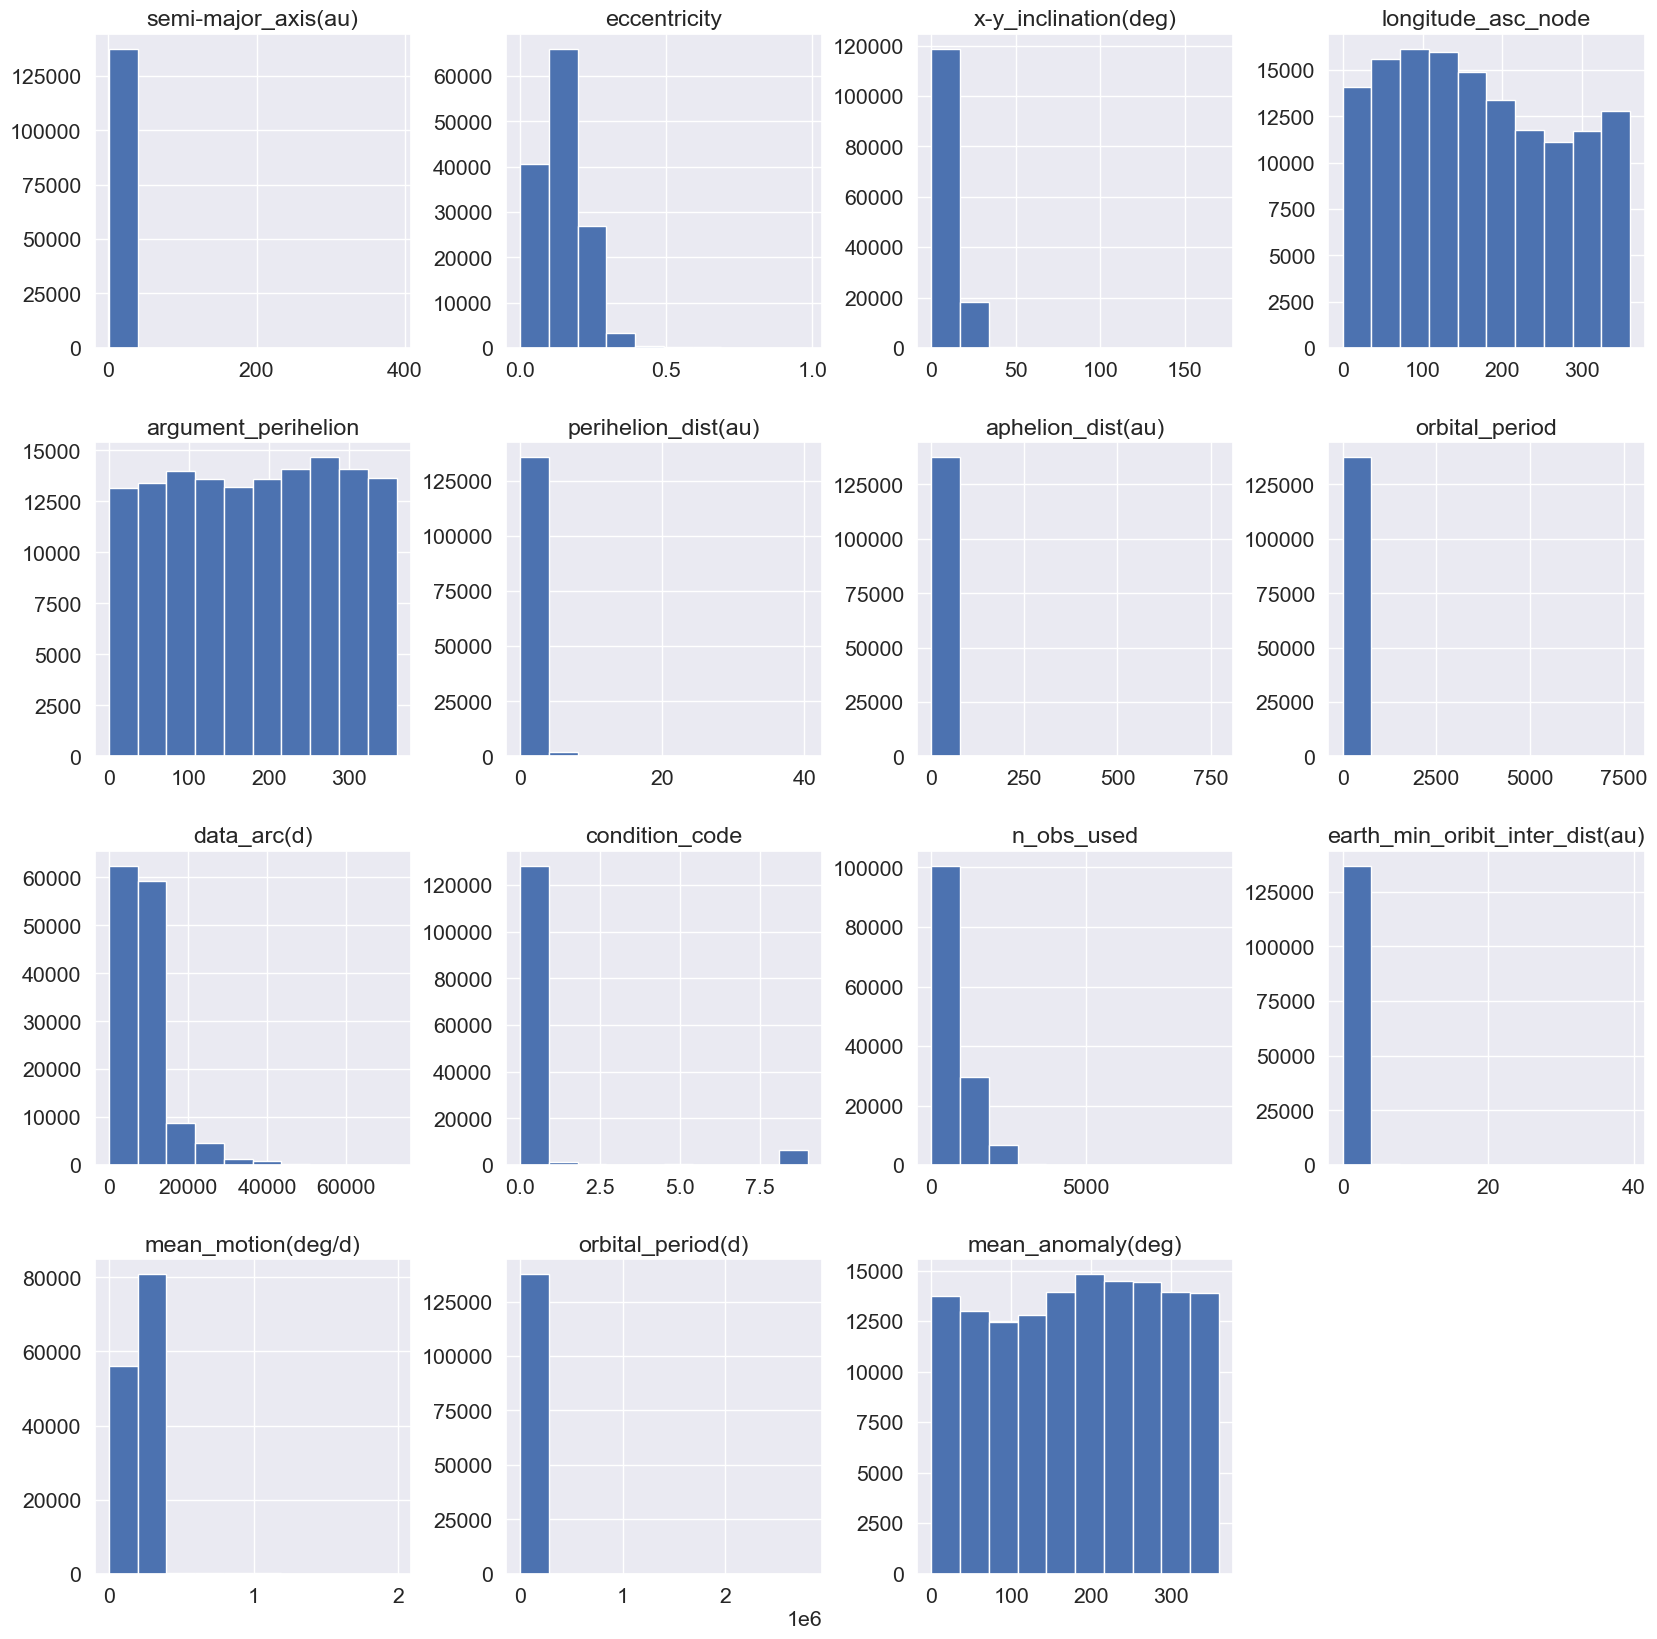

In [203]:
df.hist(figsize=(20,20))
plt.show()

<Axes: >

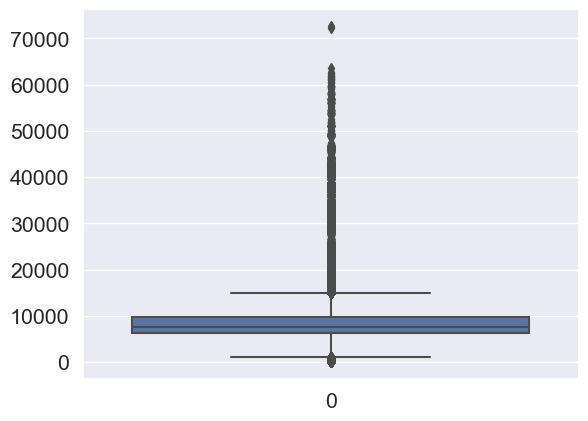

In [204]:
sns.boxplot(df['data_arc(d)'])

In [205]:
df['data_arc(d)']=df['data_arc(d)'].fillna(df['data_arc(d)'].median())

In [206]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137498.0,2.814860,1.523440,0.626226,2.537203,2.751137,3.092618,3.891460e+02
eccentricity,137498.0,0.145493,0.077562,0.000489,0.089639,0.138552,0.191136,9.843482e-01
x-y_inclination(deg),137498.0,10.344665,6.833685,0.021855,5.117951,9.384643,13.731117,1.703236e+02
longitude_asc_node,137498.0,169.822289,102.706780,0.000738,82.343922,160.429291,256.215175,3.599909e+02
argument_perihelion,137498.0,181.913131,103.556953,0.004466,91.950047,183.678210,271.783394,3.599952e+02
perihelion_dist(au),137498.0,2.402796,0.516244,0.081882,2.069182,2.364151,2.685880,4.046567e+01
aphelion_dist(au),137498.0,3.226925,2.897771,0.999956,2.864859,3.167794,3.468830,7.722011e+02
orbital_period,137498.0,4.884987,25.545348,0.495569,4.041486,4.563273,5.438730,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137498.0,0.476661,1.948461,0.000000,0.000000,0.000000,0.000000,9.000000e+00


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137498 entries, 0 to 810375
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   semi-major_axis(au)              137498 non-null  float64
 1   eccentricity                     137498 non-null  float64
 2   x-y_inclination(deg)             137498 non-null  float64
 3   longitude_asc_node               137498 non-null  float64
 4   argument_perihelion              137498 non-null  float64
 5   perihelion_dist(au)              137498 non-null  float64
 6   aphelion_dist(au)                137498 non-null  float64
 7   orbital_period                   137498 non-null  float64
 8   data_arc(d)                      137498 non-null  float64
 9   condition_code                   137498 non-null  int32  
 10  n_obs_used                       137498 non-null  int64  
 11  near_earth_obj                   137498 non-null  object 
 12  ph

In [208]:
data_type = df.dtypes
data_type[(data_type == 'object')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'diameter', 'class']

In [209]:
drop_list=['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list,axis=1,inplace=True)

In [210]:
#Set Plot Colors
sns.set_palette('inferno', 11)

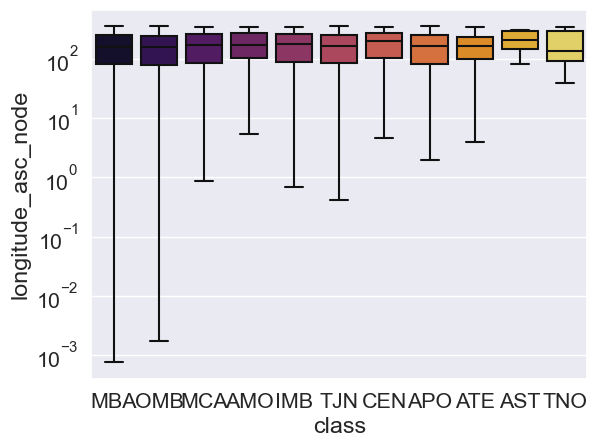

In [211]:
sns.boxplot(x='class', y='longitude_asc_node', data=df)
plt.yscale('log');

In [212]:
df['longitude_asc_node'].describe()

count    137498.000000
mean        169.822289
std         102.706780
min           0.000738
25%          82.343922
50%         160.429291
75%         256.215175
max         359.990858
Name: longitude_asc_node, dtype: float64

In [213]:
class_group=df.groupby('class').agg({'longitude_asc_node':['mean','median','min','max','std','var','count']})
print(class_group)

      longitude_asc_node                                                 \
                    mean      median        min         max         std   
class                                                                     
AMO           183.443055  177.128329   5.423701  359.109673   99.410459   
APO           171.142782  164.908556   2.005587  359.862742  101.731557   
AST           214.190358  212.986253  81.917427  314.479306   93.380183   
ATE           177.680193  169.740030   4.011744  358.617770   90.572680   
CEN           183.332345  205.294746   4.700458  348.480186  104.754458   
IMB           178.228367  180.497644   0.693840  358.898993  103.355329   
MBA           169.727002  160.075903   0.000738  359.990858  102.733597   
MCA           177.396244  174.389550   0.855640  359.199503  102.627615   
OMB           168.718209  160.553244   0.001672  359.838015  102.420842   
TJN           173.260882  169.393018   0.409298  359.960559  102.814384   
TNO           187.446925 

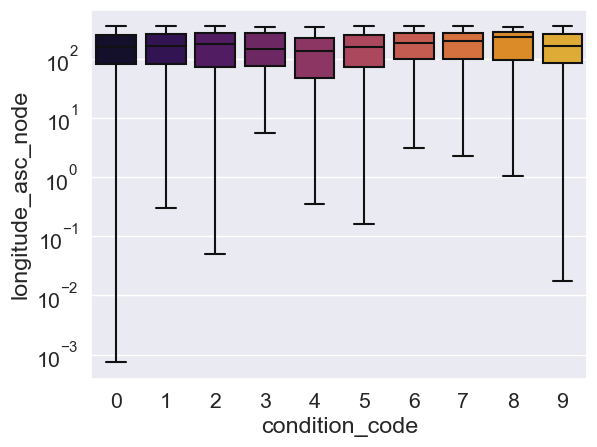

In [214]:
sns.boxplot(x='condition_code',y='longitude_asc_node',data=df)
plt.yscale('log')

In [215]:
df.drop('condition_code',axis=1,inplace=True)

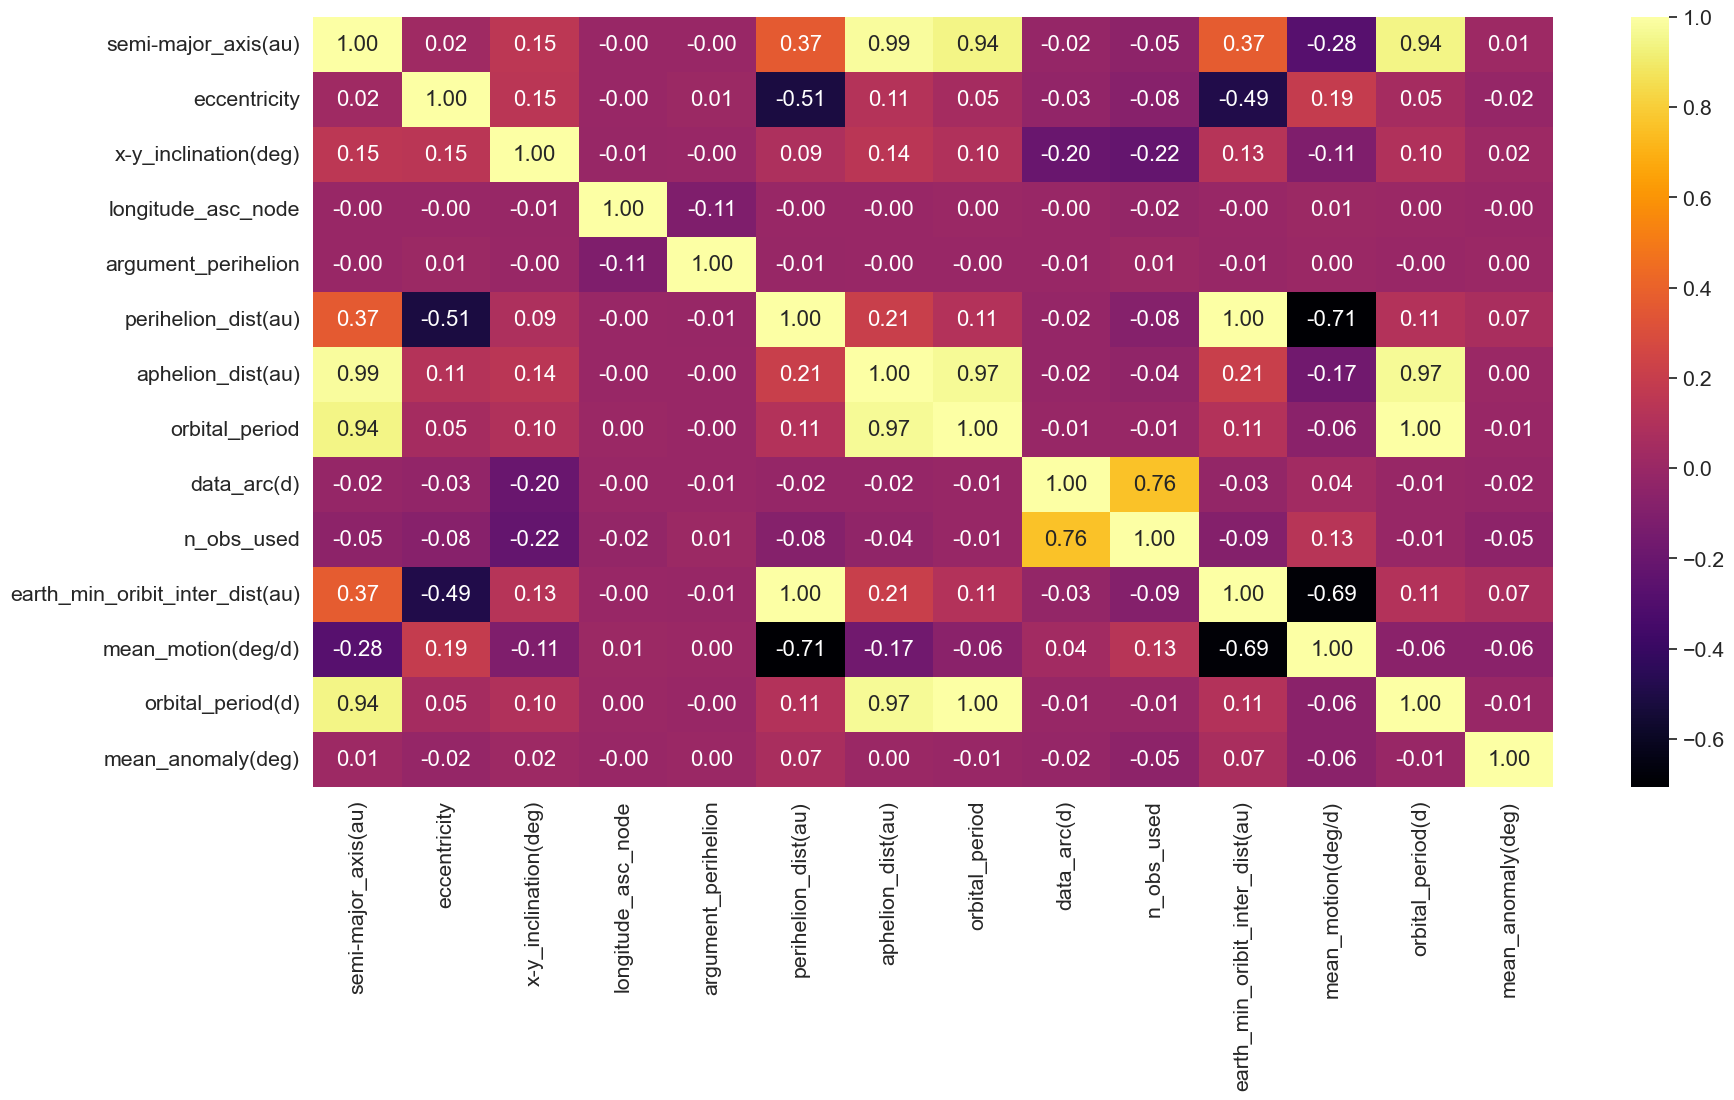

In [216]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':16});

In [217]:
#orbital_period(d) and orbital_period
df.drop('orbital_period', axis=1, inplace=True)
#perihelion_distance and earth_min_orbit_inter_dist(au)
df.drop('earth_min_oribit_inter_dist(au)', axis=1, inplace=True)

In [218]:
df.shape

(137498, 14)

In [219]:
#copying the current data frame into another variable for future purposes
df2=df

In [220]:
#assign dummy values to categorical variable
df=pd.get_dummies(df,columns=['class'])


In [221]:
df.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'data_arc(d)', 'n_obs_used', 'diameter',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

In [222]:
df.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),data_arc(d),n_obs_used,diameter,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,1002,939.4,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,72318.0,8490,545,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,72684.0,7104,246.596,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,24288.0,9325,525.4,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,63507.0,2916,106.699,...,0,0,0,0,0,1,0,0,0,0


In [223]:
df.shape

(137498, 24)

In [224]:

y=df['longitude_asc_node'] #target
x=df.drop(columns='longitude_asc_node') #independent features

In [225]:
#apply a standardized scaler to the data
SS_scaler=StandardScaler()
#Fit the standard scaler to the data
x_std=SS_scaler.fit_transform(x)

In [226]:
X_train,X_test,Y_train,Y_test=train_test_split(x_std,y,test_size=0.2,random_state=42)

In [227]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [229]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
longascn_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,longascn_pred)
rmse=np.sqrt(mse)
print("root mean squared error:"+str(rmse))
r2=r2_score(Y_test,longascn_pred)
print("r2:",r2)

root mean squared error:102.03542942687949
r2: 0.013815982376420344


In [230]:
print(f'constant={model.intercept_}')
print(f'coefficients={model.coef_}')

constant=169.9463284799177
coefficients=[ 9.15894867e+13 -1.53906250e+00 -2.10131928e+00 -1.08626973e+01
 -1.55183454e+13 -8.71072725e+13  3.01177053e+00 -5.98230596e+00
  1.62340287e+00  2.97333898e-01  6.94790703e-02 -5.18960508e-01
  2.39811926e+11  3.21753622e+11  3.87220056e+10  1.42603964e+11
  1.02433148e+11  3.53842431e+11  1.48648681e+12  2.75018383e+11
  1.23245382e+12  6.29252219e+11  5.27680472e+10]


In [231]:
n=137636 #number of observation
p=23 #number of independent variables
R2=0.3008495396647336
adj_r2=1-(1-R2)*(n-1)/(n-p-1)
print(f'Adjusted r2 score={adj_r2}')

Adjusted r2 score=0.3007326860430457


In [232]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2) 

root mean square error : 102.03555466213882
R2 Score :  0.013813561548915776


In [233]:
from sklearn.model_selection import GridSearchCV #iteration tool

ridge=Ridge()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,60,70,85,100,105,125,145,150,160,168,170,172,171,180,200,210]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.17698e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 35, 40, 45, 50, 60, 70, 85, 100,
                                   105, 125, 145, 150, 160, 168, 170, 172, 171,
                                   180, 200, ...]},
             scoring='neg_mean_squared_error')

In [234]:
print(ridge_regressor.best_params_) #best alpha value to use

{'alpha': 210}


In [235]:
model = Ridge(alpha=210)
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2) 

root mean square error : 102.03564354029906
R2 Score :  0.013811843511026711


In [236]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2)

root mean square error : 102.03669760273843
R2 Score :  0.013791468096572723


In [237]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30,35,40,45,50,60,70,85,100,105,125,145,150,160,168,170,172,171,180,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)

c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.560e+08, tolerance: 9.249e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.579e+08, tolerance: 9.280e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [240]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=1e-15)
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2)

root mean square error : 102.03555427871304
R2 Score :  0.01381356896063246


c:\Users\rithv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.724e+08, tolerance: 1.160e+05
  model = cd_fast.enet_coordinate_descent(


In [241]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2)

root mean square error : 103.85100570232117
R2 Score :  -0.021591756992877187


In [242]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))
r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2) 

root mean square error : 134.38155214272584
R2 Score :  -0.7105480285735155


In [243]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)

omPred  = model.predict(X_test)
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2)

root mean square error : 95.14421321983872
R2 Score :  0.1425264647016955


In [244]:
# Create gradientboost REGRESSOR object
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [245]:
# Train gradientboost REGRESSOR
model = gradientregressor.fit(X_train, Y_train)

#Predict the response for test dataset
omPred = model.predict(X_test)

In [246]:
mse = mean_squared_error(Y_test, omPred)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2)

root mean square error : 101.31912504172686
R2 Score :  0.02761370723029477


In [ ]:
#I am choosing 'n_estimators=200,learning_rate=0.15'
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.15)
model = gradientregressor.fit(X_train, Y_train)
omPred = model.predict(X_test)
r2 = r2_score(Y_test,omPred)
print("R2 Score : ",r2)

R2 Score :  0.057228574340371874
